In [21]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sbs
from elephant.statistics import lv, isi

import validation_functions as vf

matplotlib.rcParams['figure.figsize'] = [16, 12]
sbs.set(font_scale=1.5)

In [22]:
data = vf.get_all_data()

In [23]:
np.shape(data)

(6, 120)

# Kruskal-Wallis of LV

In [24]:
# Filter the data into excitatory and inhibitory neurons
exc = [vf.filter_data(x, neuron_type='exc', behavior=None) for x in data]
inh = [vf.filter_data(x, neuron_type='inh', behavior=None) for x in data]

In [25]:
print(np.shape(exc))
print(np.shape(inh))

(6, 90)
(6, 30)


In [26]:
exc_isi = [[isi(x) for x in dataset] for dataset in exc]
print(np.shape(exc_isi))
inh_isi = [[isi(x) for x in dataset] for dataset in inh]
print(np.shape(inh_isi))

(6, 90)
(6, 30)


In [27]:
exc_lv = [[lv(x) for x in dataset] for dataset in exc_isi]
inh_lv = [[lv(x) for x in dataset] for dataset in inh_isi]
print(np.shape(exc_lv))
print(exc_lv[0][0])

(6, 90)
0.7636546718258976


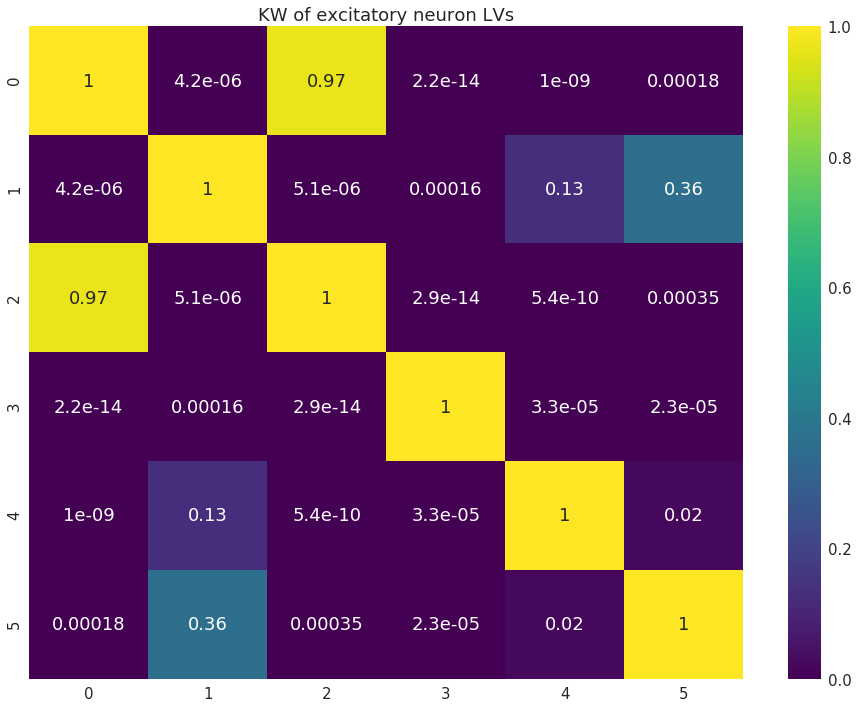

In [28]:
kw_stats = vf.kw_pairwise(exc_lv, title='KW of excitatory neuron LVs')

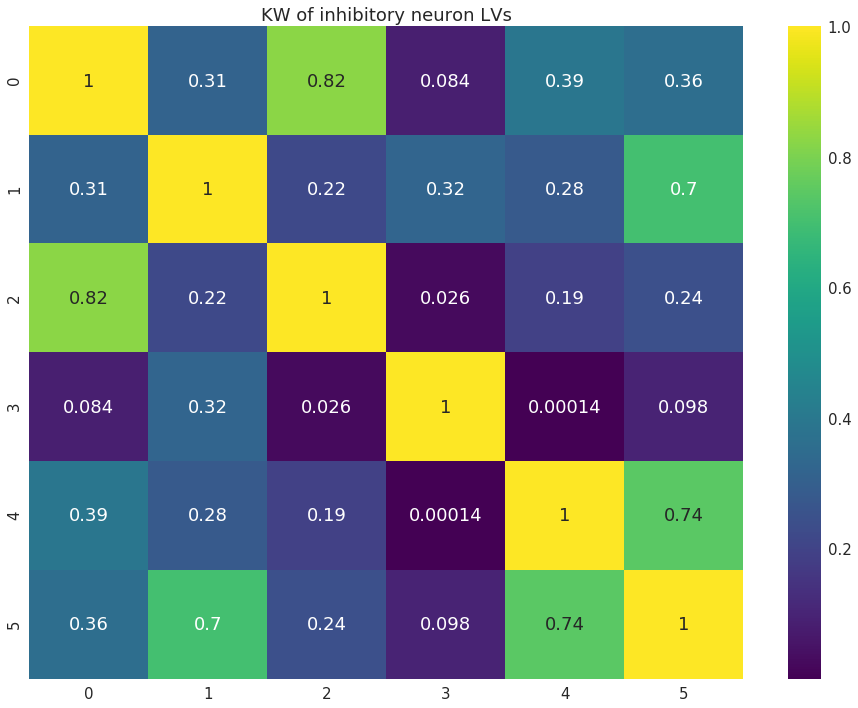

In [29]:
kw_stats = vf.kw_pairwise(inh_lv, title='KW of inhibitory neuron LVs')

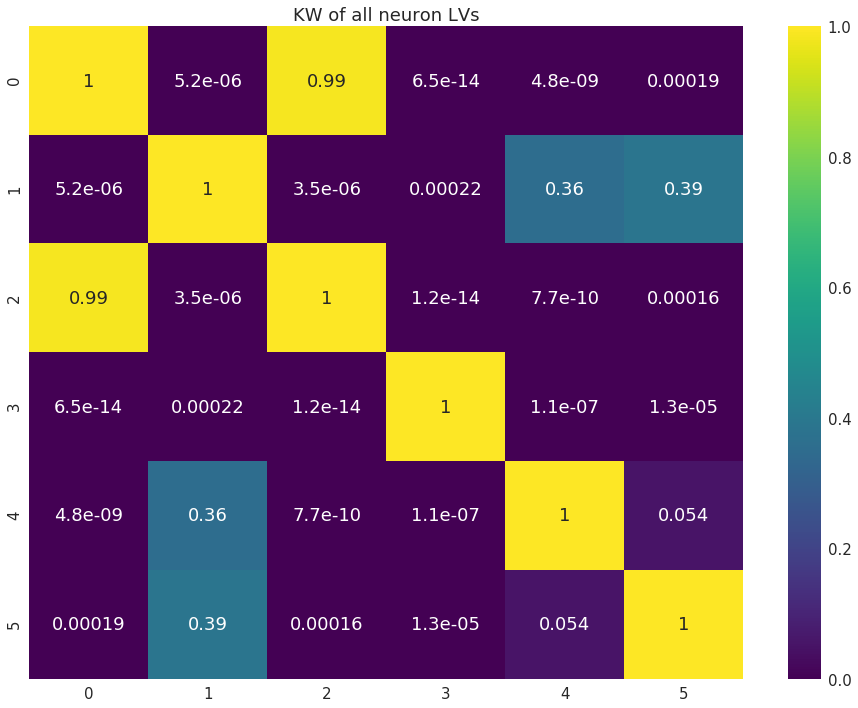

In [30]:
filtered = [vf.filter_data(x, neuron_type=None, behavior=None) for x in data]
total_isi = [[isi(x) for x in dataset] for dataset in filtered]
total_lv = [[lv(x) for x in dataset if x != []] for dataset in total_isi]
kw_stats = vf.kw_pairwise(total_lv, title='KW of all neuron LVs')